<div style="text-align:right;color:navy;font-size:16px;">Machine Learning, Data Science Review &nbsp;  &nbsp;  &nbsp; November 05, 2021</div>

# Machine Learning   &nbsp; &nbsp; <span style="font-size:20px">Lab Problem Set 6 &nbsp; &nbsp; &nbsp; 2021/11/05</span> &nbsp; &nbsp; 

<br />

<span style="color:red">上次的 Problem Set 5，大部分同學沒有完成，不過許多同學已經非常接近了! 其實同學做得很不錯!! 美中不足的是沒有使用迴圈，或許是時間的關係。所以我們決定讓同學把這個問題做完 : 用迴圈把上次的問題完成。</span>

使用迴圈就是要先將這些國家放在一個 list 當中!!

<br />

**Problem 1.** 這一個 Problem 請同學使用 subplots()、subplot() 或 add_subplot() 從這一分資料 :

    http://140.133.61.216/ML/data/covid19-data-daily.csv
    
找出 'United States', 'India', 'Brazil', 'United Kingdom' 這四個國家過去30天的每日確診人數，各繪製一個長條圖(子圖)。這分資料的最後日期是2021/10/23，所以過去30天指的是 2021/9/24 ~ 2021/10/23!! 繪製的圖表如下 :


<img src="http://140.133.61.216/ML/img/pSet5.png" />


<br />
Remark.

1. 這四個圖由於 Y 座標的數字比例各異，所以雖然 United States 的確診人數多非常多，不過如果以長條圖的高度是比較不出來，如果將四個圖的 Y 座標調成一樣 (使用 ylim)，會像是<a href="http://140.133.61.216/ML/img/pSet5B.png" target="_blank">這個圖</a>
2. 每日的確診人數似乎起伏過大，尤其是 United States，很明顯地在周末時，確診人數的調查有 delay!! 事實上多數國家都有此情況，所以目前的每日確診人數，也有以7天平均人數的計算方式 (例如 今天的確診人數以含今天的過去7天平均人數來替代)，有興趣的同學可以試試。

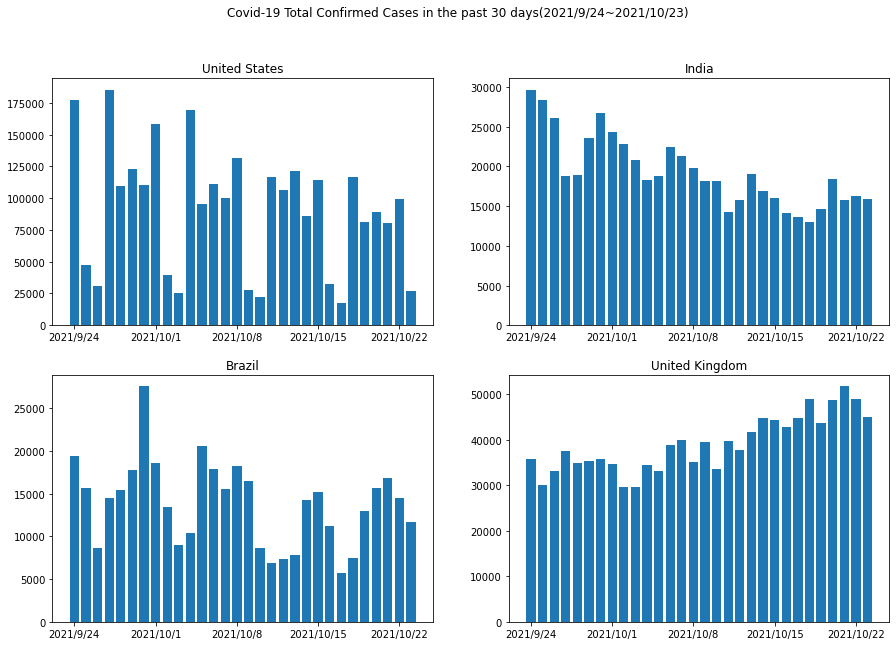

In [2]:
# Problem 1

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('http://140.133.61.216/ML/data/covid19-data-daily.csv')
usaCases= df[df['Entity']=='United States'].iloc[-30:,3]
dates=df[df['Entity']=='Brazil'].iloc[-30:,2].tolist()
indiaCases= df[df['Entity']=='India'].iloc[-30:,3]
brazilCases= df[df['Entity']=='Brazil'].iloc[-30:,3]
ukCases= df[df['Entity']=='United Kingdom'].iloc[-30:,3]
arr1=[usaCases,indiaCases,brazilCases,ukCases]
arr2=['United States','India','Brazil','United Kingdom']
fig=plt.figure(figsize=(15,10))
fig.suptitle('Covid-19 Total Confirmed Cases in the past 30 days(2021/9/24~2021/10/23)')
for i in range(1,5):
   ax = fig.add_subplot(2,2,i)
   ax.bar(dates,arr1[i-1])
   ax.title.set_text(arr2[i-1]) 
   ax.set_xticks([dates[0],dates[7],dates[14],dates[21],dates[28]])
plt.show()











<br />

**Problem 2.** 使用一個函數來執行 Problem 1 中的程式 : 寫一個函數，帶入一個 List 當參數，List 中是國家名稱，函數繪製 List 中的國家過去30天的每日確診人數(各繪製一個長條圖(子圖)) 

函數名稱、參數名稱設定為 covid19_30days(countryList)


In [3]:
# Problem 2

def covid19_30days(countryList):
    df = pd.read_csv('http://140.133.61.216/ML/data/covid19-data-daily.csv')
    fig=plt.figure(figsize=(15,len(countryList)*5))
    fig.suptitle('Covid-19 Total Confirmed Cases in the past 30 days(2021/9/24~2021/10/23)', y=0.90)
    dates= df[df['Entity']=='United States'].iloc[-30:,2].tolist()
    for i in range(len(countryList)):
        cases= df[df['Entity']==countryList[i]].iloc[-30:,3]
        ax = fig.add_subplot((len(countryList)),2,i+1)
        ax.bar(dates,cases)
        ax.title.set_text(countryList[i]) 
        ax.set_xticks([dates[0],dates[7],dates[14],dates[21],dates[28]])
        
    plt.show()
     

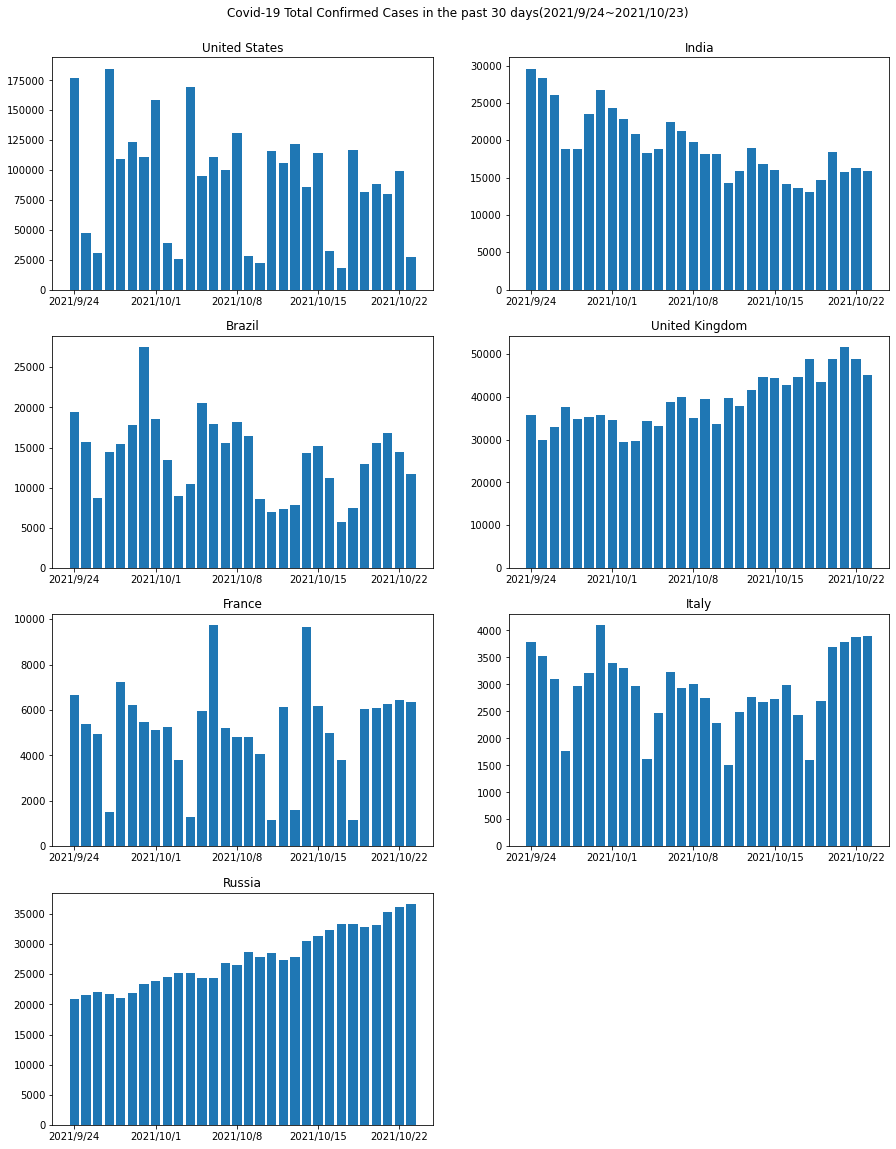

In [4]:
#使用這一行程式來測試函數有沒寫正確

covid19_30days(['United States', 'India', 'Brazil', 'United Kingdom', 'France', 'Italy', 'Russia'])